In [124]:
import numpy as np
import xgboost as xgb
import pandas as pd
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
import colorlover as cl
import time
init_notebook_mode(connected=True)
def cell():
    display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
    init_notebook_mode(connected=False)

## Predict Number Of Shares Of An News Article In Social Network
__To download data set [Click here](https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Online%20News%20Popularity/OnlineNewsPopularity.csv) save as csv file__
#### This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years.Goal is to predict the number of shares of an article in social networks.

In [125]:
df_raw=pd.read_csv('net_share.csv')

In [126]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

In [127]:
features=df_raw.columns
features

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [128]:
df_raw.columns[df_raw.isnull().any()].tolist()

[]

In [129]:
pd.set_option('display.max_columns',60)

In [130]:
unwanted_columns=['url',' num_videos',' num_imgs']
df_raw.drop(columns=unwanted_columns,axis=1,inplace=True)

In [131]:
from sklearn import utils

In [132]:
df_raw=utils.shuffle(df_raw)
df_raw.reindex(np.random.permutation(df_raw.index))
df_raw.reset_index(drop=True,inplace=True)

In [133]:
df_raw.head(5)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,660.0,9.0,106.0,0.807692,1.0,0.937500,7.0,5.0,4.216981,9.0,1.0,0.0,0.0,0.0,0.0,0.0,217.0,483.0,334.222222,35800.0,617900.0,108244.444444,2578.891519,4352.253012,3132.037286,5300.0,5300.0,5300.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022473,0.022703,0.022264,0.187563,0.744996,0.470988,0.455556,0.075472,0.018868,0.800000,0.200000,0.512500,0.2000,1.0,-0.050000,-0.050,-0.050,0.650,0.35,0.150,0.35,2000
1,710.0,11.0,233.0,0.594340,1.0,0.720000,9.0,7.0,4.721030,7.0,0.0,0.0,0.0,0.0,1.0,0.0,217.0,783.0,413.714286,3800.0,51900.0,26042.857143,1673.945946,2814.324627,2275.452440,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028638,0.028634,0.028590,0.028574,0.885563,0.347042,0.080303,0.030043,0.021459,0.583333,0.416667,0.369481,0.1000,0.6,-0.180000,-0.250,-0.125,0.000,0.00,0.500,0.00,776
2,404.0,12.0,2124.0,0.341210,1.0,0.509267,65.0,15.0,4.662900,5.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,644.0,262.800000,2200.0,843300.0,202380.000000,1331.600000,3732.520000,2861.739439,309.0,53100.0,14402.25,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.041631,0.040005,0.836217,0.042119,0.040028,0.548944,0.162899,0.049435,0.025424,0.660377,0.339623,0.438945,0.0625,1.0,-0.226382,-0.800,-0.050,0.000,0.00,0.500,0.00,1100
3,342.0,12.0,1319.0,0.452510,1.0,0.670227,17.0,6.0,4.965883,8.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,3300.0,679.375000,1900.0,843300.0,207650.000000,1331.100000,3583.890102,2347.973434,713.0,3400.0,1545.60,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.151635,0.025002,0.773359,0.025001,0.025002,0.428998,-0.031734,0.020470,0.024261,0.457627,0.542373,0.360782,0.0500,0.7,-0.415365,-0.875,-0.050,0.225,-0.05,0.275,0.05,2000
4,729.0,7.0,144.0,0.722628,1.0,0.857143,9.0,6.0,4.826389,10.0,1.0,0.0,0.0,0.0,0.0,0.0,217.0,2600.0,1031.000000,0.0,17100.0,4800.000000,0.000000,3600.000000,1268.666444,1100.0,6000.0,2760.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.021004,0.020005,0.020002,0.227075,0.711915,0.391667,0.182576,0.034722,0.027778,0.555556,0.444444,0.520000,0.5000,0.6,-0.147917,-0.200,-0.100,0.000,0.00,0.500,0.00,1000


In [134]:
df_raw.shape

(39644, 58)

In [135]:
corr=df_raw.iloc[:,:-1].corr().abs()

In [136]:
def convert_colorscale_format(colorscale):
    plotly_colorscale = []
    for index, sec_value in enumerate(np.linspace(0, 1, len(colorscale))):
        plotly_colorscale.append([sec_value, colorscale[index]])
    return plotly_colorscale

In [272]:
trace = dict(type='heatmap',z=corr.values.tolist(),x=df_raw.columns.tolist()[:-1],y=df_raw.columns.tolist()[:-1],
             colorscale=convert_colorscale_format(cl.scales['4']['seq']['PuBuGn']))
data = [trace]
layout=go.Layout(xaxis=dict(color='white',automargin=True),
                 yaxis=dict(color='white',automargin=True),
                 paper_bgcolor='deepskyblue',height=1000,width=1000)
fig = dict(data=data, layout=layout)
iplot(fig)

In [138]:
upper=corr.where(np.triu(np.ones(corr.shape),k=1).astype('bool')).values

In [139]:
feat_set=set({})
for k in range(upper.shape[0]):
    for j in range(upper.shape[0]):
        if(upper[k][j] > 0.85):
            print('{0:30} and {1:30} {2} '.format(corr.columns[k],corr.columns[j],upper[k][j]))
            feat_set.add(corr.columns[k])
            feat_set.add(corr.columns[j])
print("\nFeatures which are highly correlated are:",list(feat_set))

 n_unique_tokens               and  n_non_stop_words              0.9995717371217608 
 n_unique_tokens               and  n_non_stop_unique_tokens      0.9998515160178362 
 n_non_stop_words              and  n_non_stop_unique_tokens      0.9995323282504097 
 kw_min_min                    and  kw_max_max                    0.8572262246429935 
 kw_max_min                    and  kw_avg_min                    0.9405286635291727 
 self_reference_max_shares     and  self_reference_avg_sharess    0.8534802286626961 

Features which are highly correlated are: [' n_non_stop_words', ' self_reference_avg_sharess', ' self_reference_max_shares', ' n_non_stop_unique_tokens', ' kw_avg_min', ' kw_max_max', ' kw_min_min', ' n_unique_tokens', ' kw_max_min']


In [271]:
color_ranges=['green' if i<200000 else 'red' for i in df_raw[' shares']]
trace=go.Scatter(y=df_raw[' shares'],mode='markers',marker=dict(color=color_ranges))
data=[trace]
iplot(data)

In [141]:
df_rem=df_raw[df_raw[' shares']<200000]
df_rem.shape

(39627, 58)

In [142]:
train_percentage=df_raw.shape[0]*70//100
test_percentage=df_raw.shape[0]-train_percentage
df_train=df_raw.iloc[0:train_percentage:]
df_test=df_raw.iloc[train_percentage:train_percentage+test_percentage:]
df_train.shape[0] + df_test.shape[0] == df_raw.shape[0]

True

# Random Forest

In [143]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid,train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import parfit as pf

### Remove Correlated Features

In [144]:
df_forest=df_rem.copy()

In [145]:
df_forest.drop(columns=list(feat_set),axis=1,inplace=True)

In [146]:
train_percentage=df_forest.shape[0]*70//100
test_percentage=df_forest.shape[0]-train_percentage
df_forest_train=df_forest.iloc[0:train_percentage:]
df_forest_test=df_forest.iloc[train_percentage:train_percentage+test_percentage:]
df_forest_train.shape[0] + df_forest_test.shape[0] == df_forest.shape[0]

True

In [147]:
X_train,X_test,Y_train,Y_test=train_test_split(df_forest_train.iloc[:,:-1],df_forest_train[' shares'],test_size=0.2,random_state=100)

In [148]:
param=ParameterGrid({
                    'bootstrap':['True'],
                    'criterion':['mse'],
                    'max_depth':[30,40,50],
                    'max_features':['sqrt'],
                    'min_samples_leaf':[1,8,16,32],
                    'min_samples_split':[2,8,16,32],
                    'min_impurity_decrease':[0.25],
                    'n_estimators':[350],
                    'n_jobs':[-1],
                    'warm_start':['True']
                    })

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  38 out of  48 | elapsed:  4.3min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  43 out of  48 | elapsed:  4.7min remaining:   33.0s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  4.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  4.8min finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  2.9min finished


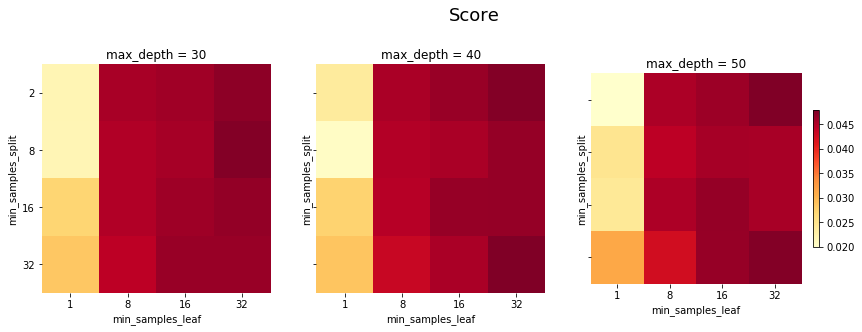

****************************************************************************************************
Time to search for parameters: 466.7406659126282
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=50,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.25, min_impurity_split=None,
           min_samples_leaf=32, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0,
           warm_start='True')
0.04795479453264795


In [149]:
bf=time.time()
best_model,best_score,all_models,all_scores =pf.bestFit(RandomForestRegressor(),
                                                      param,
                                                      X_train,Y_train,X_test,Y_test,
                                                      nfolds=10,
                                                      metric=r2_score)
af=time.time()
print('{0:*<100}'.format('*'))
print("Time to search for parameters:",af-bf)
print(best_model)
print(best_score)

In [150]:
param1=ParameterGrid({
                     'bootstrap':['True'],
                     'max_depth':[30,40],
                     'max_features':['sqrt'],
                     'min_samples_leaf':[32],
                     'min_samples_split':[16],
                     'min_impurity_decrease':[0.25],
                     'n_estimators':[100,200,250,300,350,400],
                     'max_leaf_nodes':[8,32],
                     'warm_start':['True']
})

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed:   16.0s remaining:   16.0s
[Parallel(n_jobs=-1)]: Done  15 out of  24 | elapsed:   22.6s remaining:   13.5s
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed:   24.7s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done  21 out of  24 | elapsed:   30.2s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   36.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   36.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done   9 out of  24 | elapsed:    0.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    2.3s finished


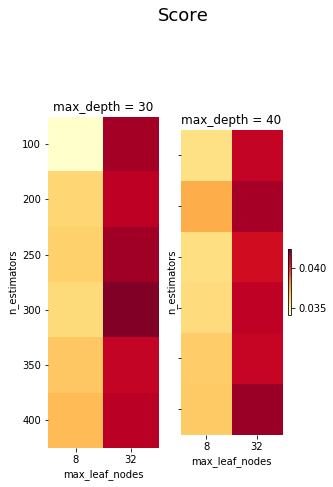

****************************************************************************************************
Time to search for parameters: 41.57588195800781
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=30,
           max_features='sqrt', max_leaf_nodes=32,
           min_impurity_decrease=0.25, min_impurity_split=None,
           min_samples_leaf=32, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=None, verbose=0,
           warm_start='True')
0.042420915312779695


In [151]:
bf=time.time()
best_model,best_score,all_models,all_scores =pf.bestFit(RandomForestRegressor(),
                                                      param1,
                                                      X_train,Y_train,X_test,Y_test,
                                                      nfolds=10,
                                                      metric=r2_score)
af=time.time()
print('{0:*<100}'.format('*'))
print("Time to search for parameters:",af-bf)
print(best_model)
print(best_score)

In [152]:
rf_pred=best_model.predict(df_forest_test.iloc[:,:-1])

In [153]:
mean_squared_error(rf_pred,df_forest_test[' shares'])

59042456.31770515

In [287]:
yhat=rf_pred
y=df_forest_test[' shares']
SS_Residual=sum((y-yhat)**2)
SS_Total=sum((y-y.mean())**2)
r2=1-(SS_Residual/SS_Total)
adj_r2=1-(1-r2)*(len(y)-1)/(len(y)-df_forest_test.shape[1]-1)
print('R2-score:',r2)
print('Adjusted R2-score:',adj_r2)

R2-score: 0.035844789469093974
Adjusted R2-score: 0.03185428306517357


### Without Removing Correlated Features

In [155]:
xf_train,xf_test,yf_train,yf_test=train_test_split(df_train.iloc[:,:-1],df_train[' shares'],test_size=0.3)

In [156]:
param2=ParameterGrid({
                     'bootstrap':['True'],
                     'max_depth':[30,40],
                     'max_features':['sqrt'],
                     'min_samples_leaf':[32],
                     'min_samples_split':[16],
                     'min_impurity_decrease':[0.25],
                     'n_estimators':[100,200,300,400,1000],
                     'max_leaf_nodes':[32],
                     'warm_start':['True']
})

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   11.7s remaining:   27.5s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   17.2s remaining:   17.2s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   21.1s remaining:    9.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   44.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.9s finished


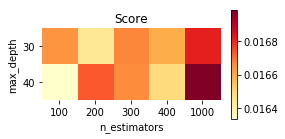

****************************************************************************************************
Time to search for parameters: 46.84257531166077
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=40,
           max_features='sqrt', max_leaf_nodes=32,
           min_impurity_decrease=0.25, min_impurity_split=None,
           min_samples_leaf=32, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0,
           warm_start='True')
0.016990116492934915


In [157]:
bf=time.time()
best_ac_model,best_ac_score,all_ac_models,all_ac_scores =pf.bestFit(RandomForestRegressor(),
                                                      param2,
                                                      xf_train,yf_train,xf_test,yf_test,
                                                      nfolds=10,
                                                      metric=r2_score)
af=time.time()
print('{0:*<100}'.format('*'))
print("Time to search for parameters:",af-bf)
print(best_ac_model)
print(best_ac_score)

In [158]:
rf_ac_pred=best_ac_model.predict(df_test.iloc[:,:-1])

In [159]:
mean_squared_error(rf_ac_pred,df_test[' shares'])

119861076.22038062

In [280]:
yhat=rf_ac_pred
y=df_test[' shares']
SS_Residual=sum((y-yhat)**2)
SS_Total=sum((y-y.mean())**2)
r2=1-(SS_Residual/SS_Total)
adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-df_test.shape[1]-1)
print('R2-score:',r2)
print('Adjusted R2-score:',adj_r2)

R2-score: 0.02213625300132549
Adjusted R2-score: 0.017344018330778588


### Feature Importance

In [161]:
import eli5
from eli5.sklearn import PermutationImportance

In [162]:
perm_rem=PermutationImportance(best_model).fit(df_forest_test.iloc[:,:-1],df_forest_test[' shares'])
eli5.explain_weights_df(perm_rem,feature_names=df_forest_test.columns.tolist()[:-1],top=10)

,feature,weight,std
0,self_reference_min_shares,0.007550,0.000226
1,kw_avg_avg,0.006635,0.000960
2,kw_max_avg,0.004737,0.001060
3,LDA_03,0.002433,0.000564
4,num_hrefs,0.001972,0.000265
5,global_subjectivity,0.000513,0.000275
6,avg_negative_polarity,0.000443,0.000398
7,n_tokens_content,0.000429,0.000253
8,data_channel_is_world,0.000324,0.000140
9,timedelta,0.000299,0.000139


In [163]:
perm_ac=PermutationImportance(best_ac_model).fit(df_test.iloc[:,:-1],df_test[' shares'])
eli5.show_weights(perm_ac,feature_names=df_test.columns.tolist()[:-1],top=30)

Weight,Feature
0.0033 ± 0.0007,kw_avg_avg
0.0032 ± 0.0014,kw_max_avg
0.0023 ± 0.0005,self_reference_min_shares
0.0023 ± 0.0004,self_reference_avg_sharess
0.0013 ± 0.0003,self_reference_max_shares
0.0012 ± 0.0007,LDA_03
0.0005 ± 0.0003,global_subjectivity
0.0003 ± 0.0004,avg_negative_polarity
0.0003 ± 0.0003,n_tokens_content
0.0003 ± 0.0006,num_hrefs


### Select Features with thresholds (0.002,0.0003) for with removal of correalted features and without removal respectively

In [183]:
from sklearn.feature_selection import SelectFromModel

In [210]:
sel_rem=SelectFromModel(perm_rem,threshold=0.002,prefit=True)
df_forest_train_transform=sel_rem.transform(df_forest_train.iloc[:,:-1])
df_forest_test_transform=sel_rem.transform(df_forest_test.iloc[:,:-1])

In [211]:
sel_ac=SelectFromModel(perm_ac,threshold=0.0003,prefit=True)
df_train_transform=sel_ac.transform(df_train.iloc[:,:-1])
df_test_transform=sel_ac.transform(df_test.iloc[:,:-1])

### Save Models  and Data Sets for Future Use

In [26]:
from sklearn.externals import joblib

In [32]:
joblib.dump(best_model,'Best_Model_Rem.pkl')
joblib.dump(best_ac_model,'Best_Model_Ac.pkl')
joblib.dump(df_raw,'Raw.pkl')
joblib.dump(df_rem,'Removed.pkl')
joblib.dump(df_forest,'Features_Removed.pkl')
joblib.dump(df_forest_train_transform,'Train_Rem.pkl')
joblib.dump(df_forest_test_transform,'Test_Rem.pkl')
joblib.dump(df_train_transform,'Train_Ac.pkl')
joblib.dump(df_test_transform,'Test_Ac.pkl');

In [70]:
pick_list=['Best_Model_Rem.pkl','Best_Model_Ac.pkl','Raw.pkl','Removed.pkl','Features_Removed.pkl','Train_Rem.pkl','Test_Rem.pkl','Train_Ac.pkl','Test_Ac.pkl']

### Load Models and Data Sets

In [71]:
best_model=joblib.load(pick_list[0])
best_ac_model=joblib.load(pick_list[1])
df_raw=joblib.load(pick_list[2])
df_rem=joblib.load(pick_list[3])
df_forest=joblib.load(pick_list[4])
df_forest_train_transform=joblib.load(pick_list[5])
df_forest_test_transform=joblib.load(pick_list[6])
df_train_transform=joblib.load(pick_list[7])
df_test_transform=joblib.load(pick_list[8])

### Data Set after removal of Correlated Columns and Unimportant Features

In [235]:
param3=ParameterGrid({
                     'bootstrap':['True'],
                     'criterion':['mse'],
                     'max_depth':[10,20,30,40,50],
                     'max_features':['sqrt','log2'],
                     'max_leaf_nodes':[8,16,32],
                     'min_impurity_decrease':[0.0,0.1,0.2,0.25],
                     'min_samples_leaf':[8,16,32],
                     'min_samples_split':[8,16,32],
                     'n_estimators':[100,200,300,400,500],
                     'n_jobs':[-1],
                     'random_state':[100],
                     'warm_start':['True']
})

In [236]:
xtr,xte,ytr,yte=train_test_split(df_forest_train_transform,df_forest_train[' shares'],test_size=0.33)

In [237]:
bf=time.time()
best_feat_model,best_feat_score,all_feat_models,all_feat_scores =pf.bestFit(RandomForestRegressor(),
                                                      param3,
                                                      xtr,ytr,
                                                      xte,yte,
                                                      nfolds=10,
                                                      metric=r2_score)
af=time.time()-bf
print('{0:*<100}'.format('*'))
print("Time to search for parameters:",af)
print(best_feat_model)
print(best_feat_score)

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2

-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed: 27.1min finished


Too many dimensions to plot.
****************************************************************************************************
Time to search for parameters: 6120.891483068466
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=20,
           max_features='sqrt', max_leaf_nodes=32,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=32, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=100, verbose=0, warm_start='True')
0.03803576295604805


In [238]:
feat_pred=best_feat_model.predict(df_forest_test_transform)

In [239]:
mean_absolute_error(feat_pred,df_forest_test[' shares'])

2844.0247534710456

In [278]:
yhat=feat_pred
y=df_forest_test[' shares']
SS_Residual=sum((y-yhat)**2)
SS_Total=sum((y-y.mean())**2)
r2=1-(SS_Residual/SS_Total)
adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-df_forest_test_transform.shape[1]-1)
print('R2-score:',r2)
print('Adjusted R2-score:',adj_r2)

R2-score: 0.034240725427070906
Adjusted R2-score: 0.03391566340264385


### Data Set after removal of Unimportant Features only

In [174]:
print(best_ac_model)

RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=40,
           max_features='sqrt', max_leaf_nodes=32,
           min_impurity_decrease=0.25, min_impurity_split=None,
           min_samples_leaf=32, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0,
           warm_start='True')


In [175]:
param4=ParameterGrid({
                     'bootstrap':['True'],
                     'criterion':['mse'],
                     'max_depth':[30],
                     'max_features':['sqrt'],
                     'max_leaf_nodes':[32],
                     'min_impurity_decrease':[0.25],
                     'min_samples_leaf':[32],
                     'min_samples_split':[16],
                     'n_estimators':[400],
                     'n_jobs':[-1],
                     'random_state':[100],
                     'warm_start':['True']
})

In [217]:
xtr_ac,xte_ac,ytr_ac,yte_ac=train_test_split(df_train_transform,df_train[' shares'],test_size=0.33)

In [218]:
bf=time.time()
best_feat_ac_model,best_feat_ac_score,all_feat_ac_models,all_feat_ac_scores =pf.bestFit(RandomForestRegressor(),
                                                      param4,
                                                      xtr_ac,ytr_ac,
                                                      xte_ac,yte_ac,
                                                      nfolds=10,
                                                      metric=r2_score)
af=time.time()-bf
print('{0:*<100}'.format('*'))
print("Time to search for parameters:",af)
print(best_feat_ac_score)

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


-------------SCORING MODELS-------------
No parameters that vary in the grid
****************************************************************************************************
Time to search for parameters: 3.494466543197632
0.040718766877489876


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished


In [219]:
feat_ac_pred=best_feat_ac_model.predict(df_test_transform)

In [220]:
mean_absolute_error(feat_ac_pred,df_test[' shares'])

3115.7654147721696

In [279]:
yhat=feat_ac_pred
y=df_test[' shares']
SS_Residual=sum((y-yhat)**2)
SS_Total=sum((y-y.mean())**2)
r2=1-(SS_Residual/SS_Total)
adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-df_test_transform.shape[1]-1)
print('R2-score:',r2)
print('Adjusted R2-score:',adj_r2)

R2-score: 0.020347547309502723
Adjusted R2-score: 0.019688126222289992


<pre>                                                   <b>Adjusted_R2_score</b> </pre>
|DataSet                             |Before Feature Selection  | After Feature Selection |
|------------------------------------|--------------------------|-------------------------|
|**Raw**                             | 0.017                    | 0.019                   |
|**Without Correlated Columns**      | 0.031                    | 0.033                   |

### Percentage of Predictions whose Absolute Difference is <= 10%

In [258]:
abs_diff=abs(np.subtract(feat_ac_pred,df_test_l))
diff_per=np.divide(abs_diff,df_test_l)*100

In [269]:
co=0
for i in diff_per:
    if i <= 10:
        co+=1
print(co)

635


In [270]:
co/diff_per.shape[0]*100

5.338826298974272